In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataaset

dataset = pd.read_csv('daten/personen_datensatz.csv', delimiter=';')  # Verwenden Sie den richtigen Pfad zur Datei
dataset.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,1,72.0,170.0,80,M.Eng.,blau,65k
1,2,25.0,197.0,107,B.A.,schwarz,65k
2,3,46.0,193.0,103,B.Sc.,NaN,65k
3,4,59.0,160.0,70,NaN,schwarz,30k
4,5,50.0,198.0,108,M.Sc.,gruen,60k


# Statiscs about the Dataset

In [8]:
dataset_count = dataset.count()
# Check for missing values
missing_vlaues_count = dataset.isnull().sum()
# Check for duplicates
duplicated_values_count = dataset.duplicated().sum()
# Check data types
data_typs = dataset.dtypes
print("Dataset Count:\n", dataset_count)
print("\nMissing Values Count:\n", missing_vlaues_count)
print("\nDuplicated Values Count:\n", duplicated_values_count)
print("\nData Types:\n", data_typs)

# Dataset description
dataset_description = dataset.describe()
print("\nDataset Description:\n", dataset_description)

# information about the non-numerical columns
non_numerical_info = dataset.select_dtypes(include=['object']).describe()
print("\nNon-Numerical Columns Information:\n", non_numerical_info)

Dataset Count:
 Person Nr.      1000
Alter            982
Groesse (cm)     985
Gewicht (kg)    1000
Abschluss        862
Augenfarbe       788
Einkommen        876
dtype: int64

Missing Values Count:
 Person Nr.        0
Alter            18
Groesse (cm)     15
Gewicht (kg)      0
Abschluss       138
Augenfarbe      212
Einkommen       124
dtype: int64

Duplicated Values Count:
 0

Data Types:
 Person Nr.        int64
Alter           float64
Groesse (cm)    float64
Gewicht (kg)      int64
Abschluss        object
Augenfarbe       object
Einkommen        object
dtype: object

Dataset Description:
         Person Nr.       Alter  Groesse (cm)  Gewicht (kg)
count  1000.000000  982.000000    985.000000   1000.000000
mean    500.500000   58.990835    179.894416     89.897000
std     288.819436   23.834182     18.054035     18.007461
min       1.000000   18.000000    150.000000     60.000000
25%     250.750000   39.000000    164.000000     74.000000
50%     500.500000   59.000000    179.000000 

# Visualaisation

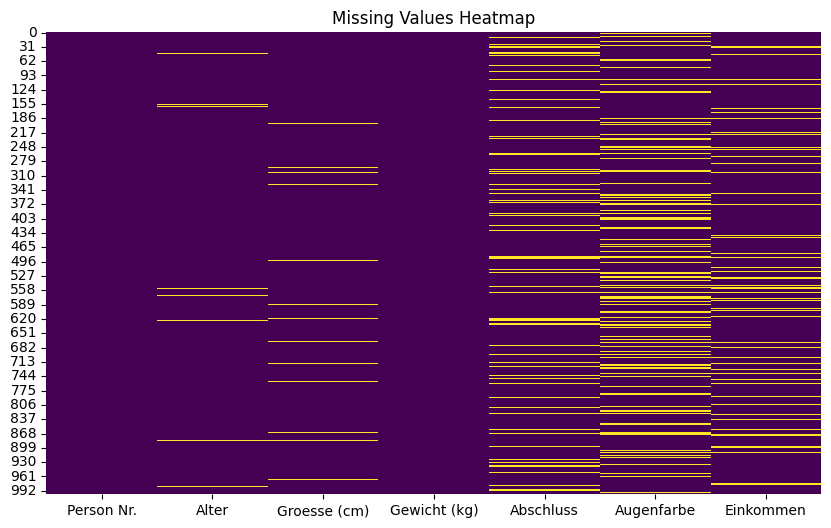

In [13]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


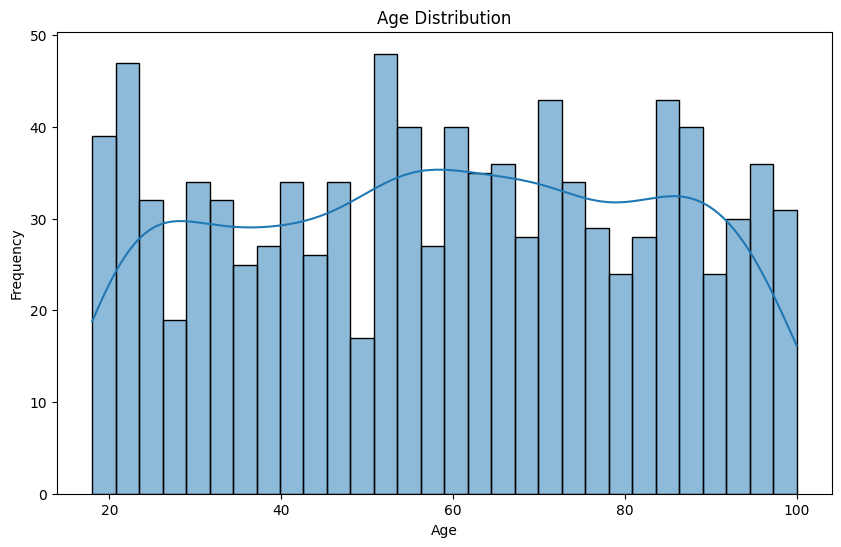

In [14]:
# Visualize the distribution of a specific column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Alter'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


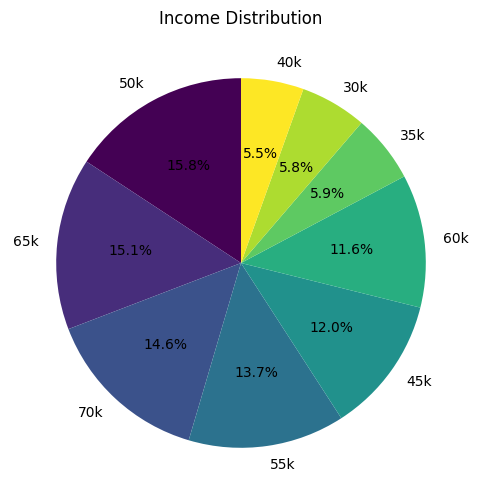

In [20]:
# Pie chart for income distribution
income_counts = dataset['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

# Data Preprocessing

## Data Transformation

In [ ]:
dataset.head()

In [ ]:
#Encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_data = onehot_encoder.fit_transform(dataset[['Abschluss', 'Zweiter Grad']]).toarray()

daten_['Erster Grad - B. Sc.'] = encoded_data[:, 0]
daten_['Zweiter Grad - B. Sc.'] = encoded_data[:, 1]
daten_['Zweiter Grad - M. Sc.'] = encoded_data[:, 2]
daten_.drop(['Erster Grad', 'Zweiter Grad'], axis=1, inplace=True)

daten_.head(6)